# Suits Report
Jakub Gazda 419 272

## ***Suits: A Legal Drama of Wit and Strategy***

***Suits*** is a riveting blend of courtroom drama, intricate plot twists, and compelling character dynamics. With its sharp dialogue, complex relationships, and high-stakes legal battles, the show keeps viewers on the edge of their seats as ***Harvey*** and ***Mike*** tackle challenges both inside and outside the courtroom.


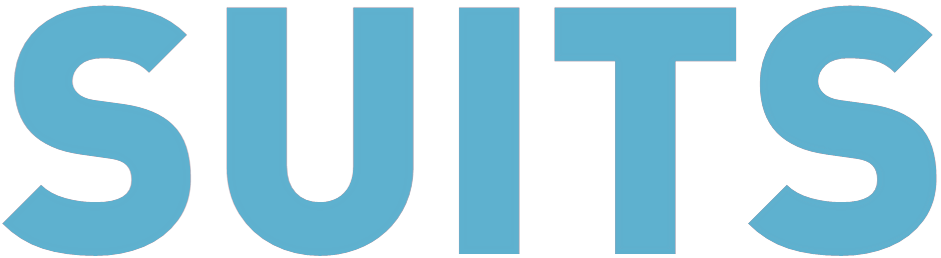

In [12]:
from IPython.display import display, Image

# Path to the image file
image_path = 'Suits_logo.png'

# Display the image
display(Image(filename=image_path))

## ***Summary of basic statistics***

I have chosen ***U.S. views count in millions*** to investigate every season's popularity. From that we can tell that the ***first season*** was a massive success with the most amounf of views from United States alone! From there we can see a decline.



In [13]:
import pandas as pd

merged_table = pd.read_csv('tables/merged_table.csv')

#pasting values to have them in 1 col
merged_table.loc[merged_table['Season'] == 3, 'U.S. viewers (millions)'] = merged_table.loc[merged_table['Season'] == 3, 'US viewers (millions)']

#cleaning the characters in view ocunt
merged_table['U.S. viewers (millions)'] = merged_table['U.S. viewers (millions)'].str.replace(r'\[\d+\]', '', regex=True).astype(float)

summary_table = merged_table.groupby('Season')['U.S. viewers (millions)'].describe()
print(summary_table)

        count      mean       std   min     25%    50%     75%   max
Season                                                              
1        12.0  4.162500  0.355224  3.47  3.9425  4.205  4.4425  4.64
2        16.0  3.601250  0.388036  2.90  3.3975  3.635  3.8200  4.48
3        16.0  2.722500  0.349447  2.27  2.4525  2.775  2.9350  3.52
4        16.0  2.260000  0.491501  1.46  1.7750  2.460  2.6625  2.81
5        16.0  2.012500  0.297131  1.51  1.7250  2.110  2.2775  2.38
6        16.0  1.596875  0.273025  1.13  1.3475  1.665  1.8350  1.92
7        16.0  1.303750  0.225207  0.95  1.0850  1.355  1.4250  1.68
8        16.0  1.022500  0.204206  0.69  0.8100  1.085  1.1650  1.30
9        10.0  0.989000  0.063849  0.86  0.9600  0.985  1.0400  1.07


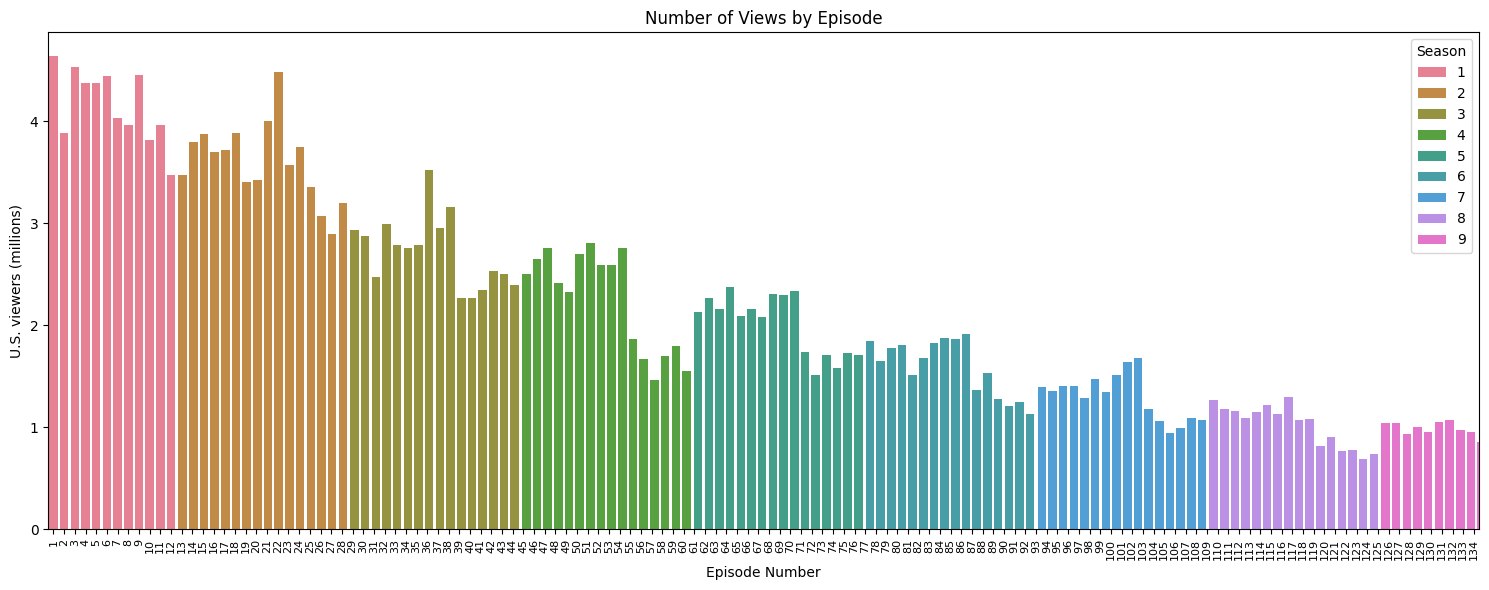

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#colors for each season
palette = sns.color_palette("husl", len(merged_table['Season'].unique()))

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=merged_table, x='No. overall', y='U.S. viewers (millions)', hue='Season', palette=palette)
plt.title('Number of Views by Episode')
plt.xlabel('Episode Number')
plt.ylabel('U.S. viewers (millions)')
plt.legend(title='Season')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=8)
bar_width = 0.8
for bar in ax.patches:
    bar.set_width(bar_width)
plt.tight_layout()
plt.show()


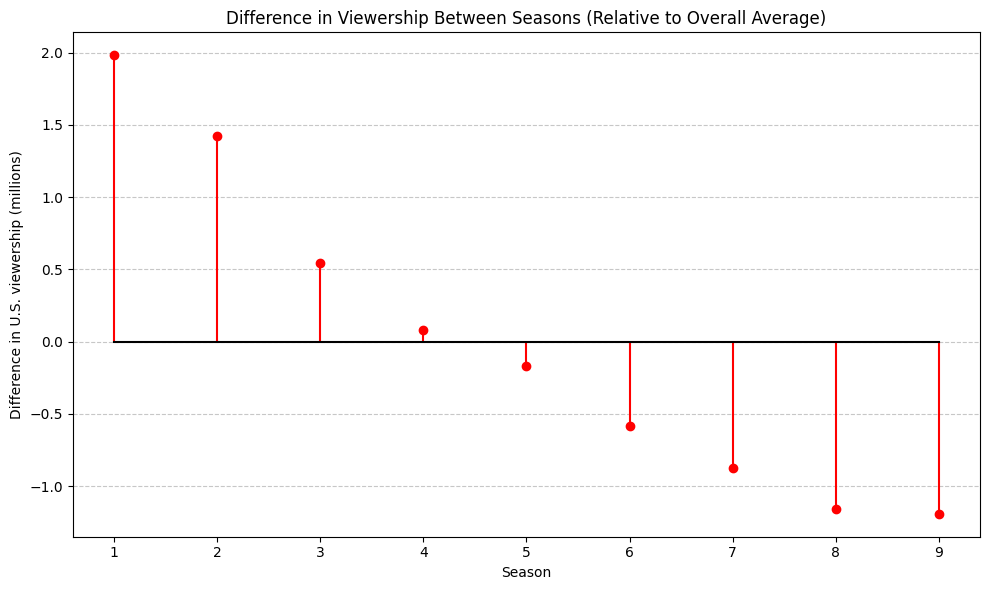

In [37]:
overall_average_viewership = merged_table['U.S. viewers (millions)'].mean()

#calculating diff
season_avg_viewership = merged_table.groupby('Season')['U.S. viewers (millions)'].mean()
season_diff_from_avg = season_avg_viewership - overall_average_viewership

plt.figure(figsize=(10, 6))
plt.stem(season_diff_from_avg.index, season_diff_from_avg.values, markerfmt='ro', linefmt='r-', basefmt='k-')
plt.title('Difference in Viewership Between Seasons (Relative to Overall Average)')
plt.xlabel('Season')
plt.ylabel('Difference in U.S. viewership (millions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
